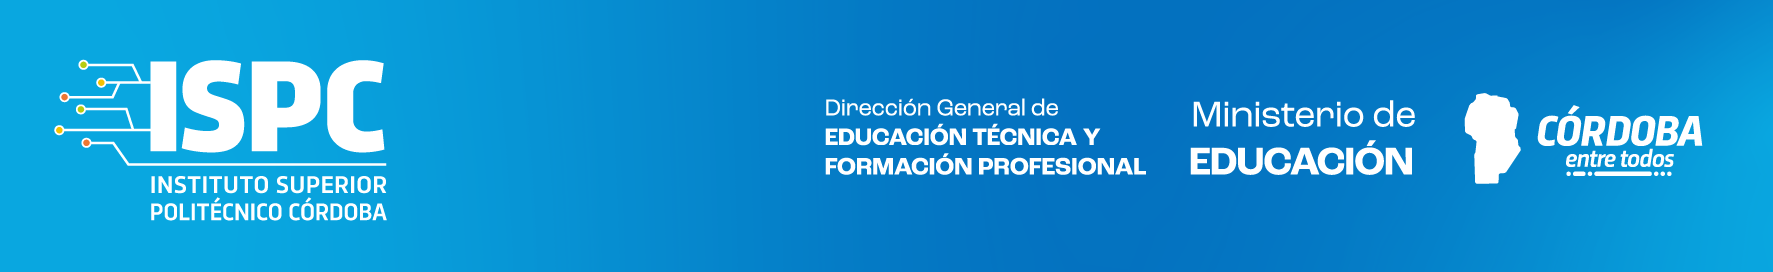

<br>
<br>

# Evidencia N° 6



<br>

# **Presentación de Analista de Datos: 27/10**



### Docentes:
- Marcos Ugarte
- Nahuel Pratta






### Alumnos Integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>

pie_de_página.png

<br>
<br>

# Carga y preparación del Dataset


<br>

En esta etapa, procederemos a cargar el conjunto de datos que ha sido procesado y curado en fases anteriores para asegurar su calidad y relevancia. Utilizaremos la librería Pandas para facilitar la manipulación de los datos. Dependiendo de tu entorno de trabajo, hay dos opciones para cargar el dataset:

 - Se puede subir el archivo CSV manualmente a la sección de archivos de Google Colab y luego cargarlo.
 - Se puede leer el archivo directamente desde un recurso online, como GitHub, utilizando la URL del archivo.


In [1]:

# Importamos la función 'data_table' de Google Colab y habilitamos el formateador de DataFrames.
# Esto permite una visualización más interactiva de los DataFrames en el entorno de Colab.

from google.colab import data_table
data_table.enable_dataframe_formatter()


<br>


In [2]:

# Importamos las librerías necesarias para cargar el dataset y
# realizar análisis posteriores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos Pandas para mostrar los números flotantes con dos decimales,
# evitando así la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargamos el dataset en un DataFrame llamado 'data'

# Para cargar el dataset desde Google Colab de manera manual en la seccion de archivos, usa la siguiente línea
# data = pd.read_csv('autos_argentina_curado.csv')

# Para leer el archivo directamente desde GitHub, utiliza la siguiente línea
data = pd.read_csv('https://raw.githubusercontent.com/ISPC-TSCDIA/Data24_PPI/refs/heads/main/datos/autos_argentina_curado.csv')

# Verificamos el dataset
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,10850000,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,5800000,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,5250000,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,3960000,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900,dólares,0.74


<br>

En los datos recolectados, se encuentran registros de autos en pesos y en dólares. Para unificar la moneda, realizamos una transformación en el dataframe para convertir todos los valores a dólares.

<br>

Optamos por esta alternativa considerando la posibilidad de añadir más registros en el futuro, lo que garantiza que todos los datos estén en una moneda constante y unificada.

<br>

Sin esta unificación, los análisis quedarían sesgados. La primera visualización del dataset muestra una gran diferencia nominal debido a la brecha cambiaria.

<br>

**Elección del tipo de cambio**

En Argentina, el tipo de cambio paralelo, conocido como "dólar blue", ofrece una mejor representación de la realidad económica para dolarizar precios en un dataset, especialmente para bienes de alto valor como vehículos. Esto se debe a que refleja de manera más precisa el acceso real a dólares, el poder adquisitivo y un ajuste más fiel a la realidad económica. Por lo tanto, utilizar el tipo de cambio paralelo puede mejorar la capacidad predictiva de los modelos. En conclusión, el tipo de cambio paralelo ofrece una mejor representación de la realidad económica de las transacciones de vehículos en Argentina.

<br>

**Tipo de cambio con el que se trabajará:** 1USD = 380ARS

Fuente de la cotización: https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2023

<br>


In [3]:

# Definimos la tasa de cambio (1 USD = 380 ARS)
tipo_cambio = 380

# Función para convertir precios de pesos a dólares
def convertir_a_dolar(row):
    if row['Moneda'] == 'pesos':
        return row['Precio'] / tipo_cambio
    return row['Precio']

# Aplicamos la función a cada fila del dataframe y redondeamos a dos decimales
data['Precio'] = data.apply(lambda x: round(convertir_a_dolar(x), 2), axis=1)

# Verificamos el dataframe transformado
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00,dólares,0.74


<br>

Dado que las columnas `Moneda` y `Año_zscore` (esta última proveniente de otro análisis) ya no serán necesarias, las eliminamos del dataframe.

Para realizar esta acción utilizamos el método `drop()` de Pandas, donde:

- El parámetro `columns=['Moneda', 'Año_zscore']` especifica las columnas que se quieren eliminar

- `drop()` devuelve una copia del dataframe sin las columnas especificadas, por lo que reasignamos el resultado a `data`.

<br>


In [4]:

# Eliminamos las columnas 'Moneda' y 'Año_zscore'
data = data.drop(columns=['Moneda', 'Año_zscore'])

# Verificamos el dataframe sin esas columnas
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00
...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00


<br>
<br>

pie_de_página.png

<br>
<br>

# Preprocesamientos de los datos

Para construir nuestro modelo de regresión lineal múltiple, realizamos un preprocesamiento detallado en nuestro conjunto de datos. Este preprocesamiento incluyó la división de datos, estandarización de variables numéricas, y el uso de variables _dummy_ para las variables categóricas. Dado el tamaño reducido del dataset, encontramos un error común relacionado con categorías desconocidas en el conjunto de prueba. A continuación, se detalla cómo resolvimos este problema y el proceso completo de preparación de los datos.

<br>
<br>

### División del dataset en conjunto de entrenamiento y prueba

En este análisis, comenzamos definiendo nuestras variables para el modelo predictivo. La variable dependiente (o objetivo) es `Precio, mientras que las variables independientes son todas las demás columnas del conjunto de datos. Para evaluar el rendimiento de nuestro modelo, es fundamental dividir el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. En este caso, utilizamos el 80% de los datos para entrenar el modelo y el 20% restante para validarlo.

Para llevar a cabo esta división, utilizamos la función `train_test_split` de la biblioteca `scikit-learn`. Este proceso asegura que nuestro modelo sea entrenado con una parte significativa de los datos, mientras que el conjunto de prueba nos permite evaluar su desempeño en datos no vistos.

In [6]:
from sklearn.model_selection import train_test_split

# Definimos las variables independientes y dependientes
X = data.drop(['Precio'], axis=1)  # Variables independientes: todo menos 'Precio'
y = data['Precio']                  # Variable dependiente: 'Precio'

# Dividimos el dataset en un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora tenemos:
# - X_train, y_train: datos de entrenamiento
# - X_test, y_test: datos de prueba


<br>

Los elementos y parámetros principales que nos quedan son los siguientes:

- `X` : Es el conjunto de características o todas las variables que se usarán para predecir. Es todo el conjunto de datos excepto la columna que se está tratando de predecir (en nuestro caso, el "Precio"). En otras palabras, son las entradas que se utilizan para hacer las predicciones.

  Ejemplo de columnas en `X`: Marca, Modelo, Año, Kilómetros, Motor, etc.

- `y` : La variable objetivo  o respuesta. Es la columna que estamos tratando de predecir, que en este caso es "Precio".

  Ejemplo: Los precios de los autos.

<br>

- `train_test_split` : Esta es la función que divide propiamente el conjunto de datos en dos partes:
  - Un conjunto de entrenamiento (`train`), que se usa para entrenar el modelo.
  - Un conjunto de prueba (`test`), que se usa para evaluar el modelo una vez entrenado.

<br>

- `X_train`, `X_test`, `y_train`, `y_test` :

  - `X_train` : Estas son las características (variables predictoras) que el modelo utilizará para entrenarse. Es una parte de las filas de X.
  Ejemplo: Si se tienen 1000 filas en total y se decide usar el 80% para entrenamiento, entonces `X_train` contendrá las características de 800 filas.

  - `y_train` : Estos son los valores de la variable objetivo (Precio) correspondientes a las filas seleccionadas en `X_train` . Aquí es donde el modelo aprenderá la relación entre las características y el valor a predecir (Precio).

  - `X_test` : Estas son las características de las filas que el modelo no verá durante el entrenamiento. Se utilizan para evaluar cómo de bien generaliza el modelo. Estas características provienen del 20% restante (test).

  - `y_test` : Son los valores reales del precio de las filas seleccionadas en `X_test` . Después de entrenar el modelo, se usará este conjunto para ver qué tan bien el modelo predice el precio en datos nuevos (que no se usaron en el entrenamiento).

<br>

- `test_size=0.2` : Este parámetro indica el porcentaje de los datos que se usarán para el conjunto de prueba. En este caso, el 20% de los datos (0.2) serán utilizados para prueba, y el 80% restante (0.8) se usarán para entrenar el modelo.

- `random_state=40` : El parámetro `random_state` es una semilla que se utiliza para asegurar que la división de los datos sea reproducible. En este caso, se usa el valor 40 (aunque puede ser cualquier número). Esto significa que si se vuelve a ejecutar el código con el mismo valor de `random_state`, se obtendrá siempre la misma división entre entrenamiento y prueba.
  - Sin este valor, cada vez que se ejecute `train_test_split`, se obtendría una división diferente de los datos. `random_state` es útil cuando se quiere que los experimentos sean reproducibles y que otras personas (o uno mismo) obtengan los mismos resultados en el futuro.

De esta manera, podemos entrenar los modelos con `X_train` e `y_train`, y luego evaluar su rendimiento con los conjuntos `X_test` e `y_test`.

<br>

|||
|-|-|
|`X_train`|Características para entrenar el modelo.|
|`y_train`|Valores de la variable objetivo para entrenar el modelo.|
|`X_test`|Características para evaluar el modelo.|
|`y_test`|Valores reales (objetivo) correspondientes a `X_test` para evaluar el rendimiento del modelo.|
|`test_size=0.2`|Usa el 20% de los datos para prueba, y el 80% para entrenamiento.|
|`random_state=42`|Garantiza que la división sea la misma cada vez que ejecutes el código.|


<br>
<br>

Verificamos la forma de los conjuntos divididos:


In [7]:

# Mostrar las dimensiones de los datos de entrada y de la variable objetivo
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (400, 10)
Forma de y_train: (400,)
Forma de X_test: (100, 10)
Forma de y_test: (100,)


<br>
<br>

## Estandarización de variables numéricas y transformación de variables categóricas


El modelo de regresión lineal múltiple requiere que todas las variables sean numéricas. Por ello, es fundamental transformar las variables categóricas del dataframe, como `Marca`, `Modelo`, `Color`, `Combustible`, `Caja` y `Carrocería`, en representaciones numéricas. Para este propósito, se pueden aplicar técnicas como **One-Hot Encoding** o **Label Encoding**.

Dado que las categorías en el dataset no tienen un orden inherente, **One-Hot Encoding** es la opción más adecuada. Esta técnica permite representar las variables categóricas sin introducir relaciones numéricas erróneas que podrían surgir al usar **Label Encoding**. Además, dado que el dataset no es muy extenso, el incremento en el número de columnas resultante de esta transformación no afectará significativamente el rendimiento del modelo.

**One-Hot Encoding** es una técnica que convierte variables categóricas en un formato adecuado para algoritmos de aprendizaje automático. En este método, cada categoría de una variable se transforma en una nueva columna binaria: un valor de 1 indica la presencia de esa categoría en una observación, mientras que un valor de 0 señala su ausencia. Esta representación permite que los algoritmos interpreten cada categoría de forma independiente, evitando así la introducción de un orden artificial entre ellas.

Ahora identificamos y clasificamos las columnas de un conjunto de datos en categorías y numéricas. Esta separación es fundamental para aplicar las transformaciones adecuadas a cada tipo de variable, optimizando así el análisis y el procesamiento de la información.

In [8]:

# Definimos las columnas categóricas y numéricas
columnas_categoricas = X.select_dtypes(include=['object']).columns
columnas_numericas = X.select_dtypes(include=['float64', 'int64']).columns

# Mostrar las columnas categóricas y numéricas
print("Columnas categóricas:", columnas_categoricas)
print("Columnas numéricas:", columnas_numericas)


Columnas categóricas: Index(['Marca', 'Modelo', 'Color', 'Combustible', 'Caja', 'Carrocería'], dtype='object')
Columnas numéricas: Index(['Año', 'Puertas', 'Motor', 'Kilómetros'], dtype='object')


<br>

La función `select_dtypes` se utiliza para identificar las columnas en el DataFrame `X_train`. A través de esta función, se separan las columnas categóricas (de tipo `object`) de las numéricas (de tipos `float64` e `int64`), almacenándolas en listas. Finalmente, se imprimen ambas listas, lo que permite visualizar claramente las variables que requieren transformaciones específicas.

<br>

### Definición del preprocesador



Se configura un preprocesador utilizando `ColumnTransformer`, una herramienta esencial para aplicar transformaciones específicas a diferentes columnas de un dataframe. Este enfoque es fundamental para preparar los datos antes del entrenamiento del modelo, asegurando que todas las variables se manejen de manera adecuada.

<br>

Para optimizar la precisión del modelo, es crucial estandarizar las variables numéricas, como `Año`, `Puertas`, `Motor` y `Kilómetros`. Utilizamos `StandardScaler`, que normaliza los datos de forma que tengan una media de 0 y una desviación estándar de 1. Esta estandarización es vital, ya que evita que el modelo de regresión se vea influenciado por diferencias de escala entre las variables, facilitando un entrenamiento más eficiente y efectivo.

<br>

En cuanto a las variables categóricas, aplicamos OneHotEncoder con las opciones `drop='first'` y `handle_unknown='ignore'`. Esta técnica transforma las variables categóricas en variables _dummy_ (indicadoras) y elimina una de las categorías para evitar colinealidad. La opción `handle_unknown='ignore'` gestiona eficazmente las categorías desconocidas que pueden aparecer en el conjunto de prueba, asegurando que el modelo sea robusto y generalizable.

<br>

In [9]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Definimos las variables independientes y dependientes
X = data.drop(['Precio'], axis=1)  # Variables independientes: todo menos 'Precio'
y = data['Precio']  # Variable dependiente: 'Precio'

# Definimos las columnas categóricas y numéricas
columnas_categoricas = X.select_dtypes(include=['object']).columns
columnas_numericas = X.select_dtypes(include=['float64', 'int64']).columns

# Crear un preprocesador que aplica One-Hot Encoding a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),  # Estandarizar columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)  # Codificar columnas categóricas
    ],
    remainder='passthrough'  # Mantener las columnas numéricas sin cambios
)

# Crear el modelo de regresión lineal dentro de un Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados de evaluación
print(f"\n\n MSE: {mse :.2f}")
print(f"\n MAE: {mae :.2f}")
print(f"\n R²: {r2 :.2f}")

# Visualización de las estadísticas de los datos numéricos después de la estandarización

# Preprocesar solo las columnas numéricas
X_train_num = X_train[columnas_numericas]
X_test_num = X_test[columnas_numericas]

# Ajustar el preprocesador a los datos de entrenamiento y transformar
scaler = StandardScaler()
X_train_num_escalado = scaler.fit_transform(X_train_num)
X_test_num_escalado = scaler.transform(X_test_num)

# Convertir de nuevo a DataFrames para facilitar la visualización
X_train_num_escalado_df = pd.DataFrame(X_train_num_escalado, columns=columnas_numericas)
X_test_num_escalado_df = pd.DataFrame(X_test_num_escalado, columns=columnas_numericas)

# Visualización de las estadísticas de los datos numéricos
print("\nEstadísticas de datos numéricos - Entrenamiento")
print(X_train_num_escalado_df.describe())

print("\nEstadísticas de datos numéricos - Prueba")
print(X_test_num_escalado_df.describe())




 MSE: 596997510.56

 MAE: 7361.10

 R²: 0.73

Estadísticas de datos numéricos - Entrenamiento
         Año  Puertas  Motor  Kilómetros
count 400.00   400.00 400.00      400.00
mean   -0.00     0.00   0.00       -0.00
std     1.00     1.00   1.00        1.00
min    -5.56    -3.30  -1.25       -1.63
25%    -0.55    -0.63  -0.40       -0.69
50%     0.25     0.71  -0.40       -0.18
75%     0.77     0.71   0.17        0.54
max     1.56     0.71   6.39        5.48

Estadísticas de datos numéricos - Prueba
         Año  Puertas  Motor  Kilómetros
count 100.00   100.00 100.00      100.00
mean    0.26     0.03  -0.03       -0.26
std     0.85     1.07   0.97        0.94
min    -1.86    -3.30  -1.25       -1.63
25%    -0.35    -0.63  -0.54       -0.87
50%     0.51     0.71  -0.40       -0.37
75%     0.77     0.71   0.17        0.21
max     1.56     0.71   5.40        3.50


<br>
<br>

pie_de_página.png

<br>
<br>

# Regresión Lineal Múltiple


<br>

## Relación entre variables

<br>

**Análisis de correlación entre variables**

Después de realizar el preprocesamiento de los datos, es esencial alinear las variables independientes escaladas (X_train_escalado_data) con la variable dependiente (y_train). Para lograr esto, primero reiniciamos el índice de y_train utilizando reset_index(drop=True), lo que asegura que los índices coincidan con los de las variables independientes. Esto es fundamental para mantener la integridad de los datos y garantizar que cada precio se asocie correctamente con su respectiva entrada de características.

Una vez alineados los índices, se agrega la variable dependiente Precio al DataFrame de características escaladas (X_train_escalado_data). Esto permite analizar cómo el precio se relaciona con las diferentes características del conjunto de datos.

A continuación, se calcula la matriz de correlación utilizando el método de Pearson, que mide la relación lineal entre las variables. La matriz resultante muestra cómo cada variable numérica se correlaciona con las demás. Para facilitar la interpretación, se crea una máscara que oculta los valores duplicados en la matriz de correlación, enfocándose en las correlaciones únicas.

La matriz de correlación se convierte en un formato 'tidy', que es más adecuado para el análisis y la visualización. Esto implica apilar la matriz y renombrar las columnas de manera que reflejen claramente las variables involucradas en cada correlación.

Se eliminan los valores nulos que podrían haber sido introducidos por la máscara, y se calcula el valor absoluto de las correlaciones para facilitar la clasificación. Finalmente, las correlaciones se ordenan de mayor a menor valor absoluto, permitiendo identificar rápidamente las relaciones más significativas entre las variables.

La visualización de esta matriz de correlación no solo ayuda a entender las interacciones entre las variables, sino que también puede guiar decisiones sobre modelos predictivos y selección de características en análisis futuros.

In [ ]:

# Reiniciar el índice de y_train para que coincida con el de X_train_escalado_data
y_train = y_train.reset_index(drop=True)

# Agregar el precio a los datos escalados
X_train_escalado_data['Precio'] = y_train.values  # Agregar la variable dependiente

# Calcular la matriz de correlación con el método Pearson
corr_matrix = X_train_escalado_data.corr(method='pearson')

# Crear una máscara para los valores duplicados en la matriz de correlación
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan

# Convertir la matriz de correlación en un formato 'tidy'
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})

# Eliminar valores nulos (ya que hemos creado la máscara en la parte inferior)
corr_matrix_tidy = corr_matrix_tidy.dropna()

# Calcular el valor absoluto de las correlaciones para ordenar
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()

# Ordenar las correlaciones por su valor absoluto de mayor a menor
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)

# Mostrar las correlaciones
corr_matrix_tidy


,variable_1,variable_2,r,r_abs
0,num__Año,num__Kilómetros,-0.68,0.68
1,num__Motor,Precio,0.59,0.59
2,cat__Combustible_Nafta,cat__Carrocería_Pick-Up,-0.59,0.59
3,cat__Marca_Otras,cat__Marca_Volkswagen,-0.48,0.48
4,num__Motor,cat__Carrocería_Pick-Up,0.46,0.46
...,...,...,...,...
185,cat__Color_Gris,cat__Carrocería_Pick-Up,-0.00,0.00
186,cat__Marca_Ford,cat__Color_Gris,-0.00,0.00
187,num__Puertas,cat__Marca_Otras,-0.00,0.00
188,cat__Marca_Ford,cat__Carrocería_SUV,-0.00,0.00


<br>

### Matriz de correlación

La matriz de correlación es una herramienta estadística que permite evaluar la relación entre variables numéricas en un conjunto de datos. En este análisis, se calcula el coeficiente de correlación de Pearson, que mide la fuerza y la dirección de la relación lineal entre pares de variables. Los valores de correlación varían entre -1 y 1, donde:

- Un valor de 1 indica una correlación positiva perfecta: a medida que una variable aumenta, la otra también lo hace.
- Un valor de -1 indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- Un valor de 0 sugiere que no hay relación lineal entre las variables.

<br>

Para visualizar estas relaciones de manera más intuitiva, se utiliza un _heatmap_ (gráfico de calor). En el _heatmap_, cada celda representa la correlación entre un par de variables, con colores que indican la fuerza y la dirección de la correlación. Las celdas con tonos oscuros (ya sean rojos o azules) indican correlaciones fuertes, mientras que los tonos claros indican correlaciones débiles.

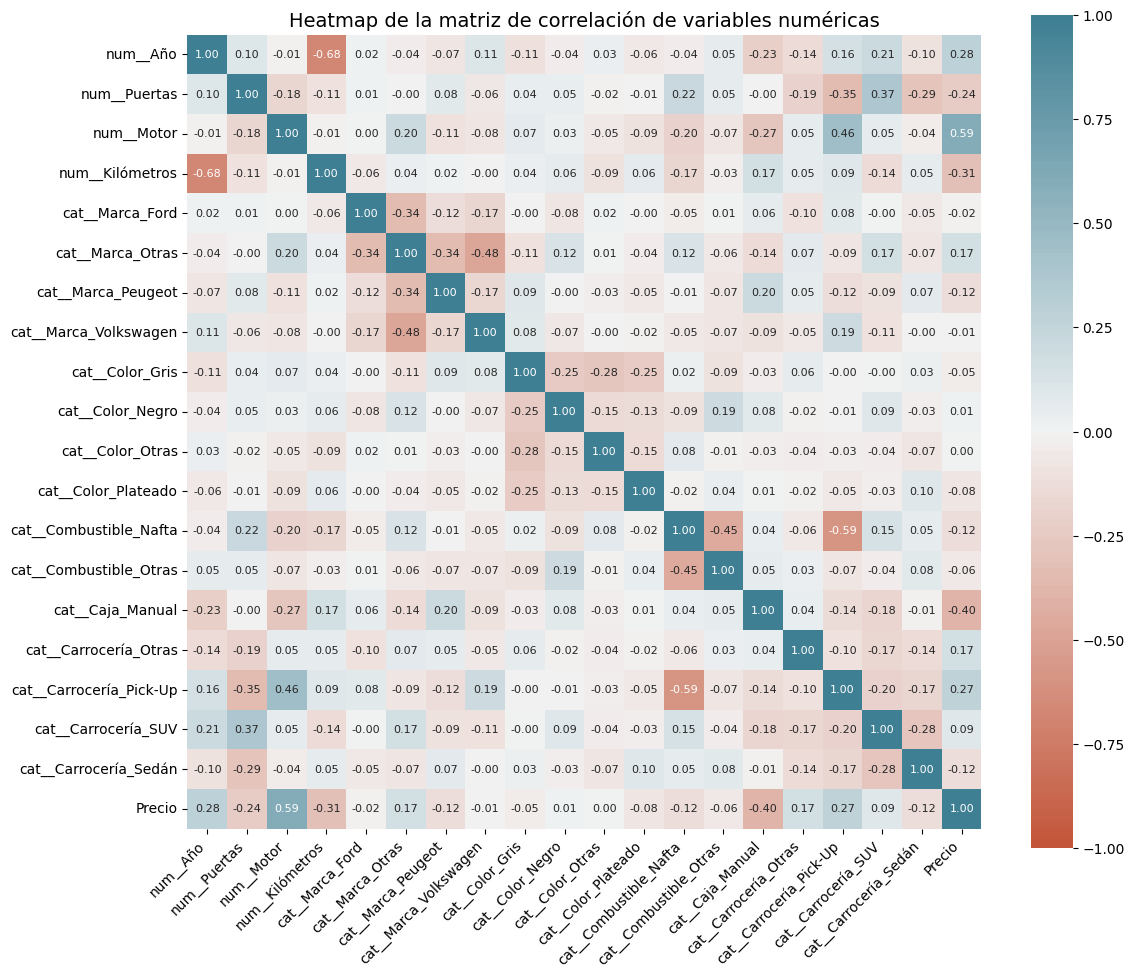

In [ ]:

# Calcular la matriz de correlaciones
correlation_matrix = X_train_escalado_data.corr()

# Visualizar la matriz de correlación como un gráfico de calor
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Formato de los valores numéricos para mostrar dos decimales
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Ajustes en el gráfico
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap de la matriz de correlación de variables numéricas', fontsize=14)
plt.tight_layout()
plt.show()


<br>

**Gráfico de distribución para cada variable numérica**

El gráfico presentado ilustra la distribución de las variables numéricas en nuestro conjunto de datos. A través de histogramas y curvas de densidad (KDE), se puede observar cómo se distribuyen los valores de cada variable. Los histogramas muestran la frecuencia de los valores, permitiendo identificar patrones como la simetría, la presencia de picos o la existencia de valores atípicos.

La curva de KDE proporciona una representación suavizada de la distribución, facilitando la visualización de tendencias generales. Este análisis es crucial, ya que una comprensión profunda de la distribución de cada variable puede influir en las decisiones sobre el preprocesamiento de datos y en la selección de modelos de análisis.

Al comparar las distribuciones de las diferentes variables, se pueden descubrir relaciones y características que podrían no ser evidentes a simple vista.

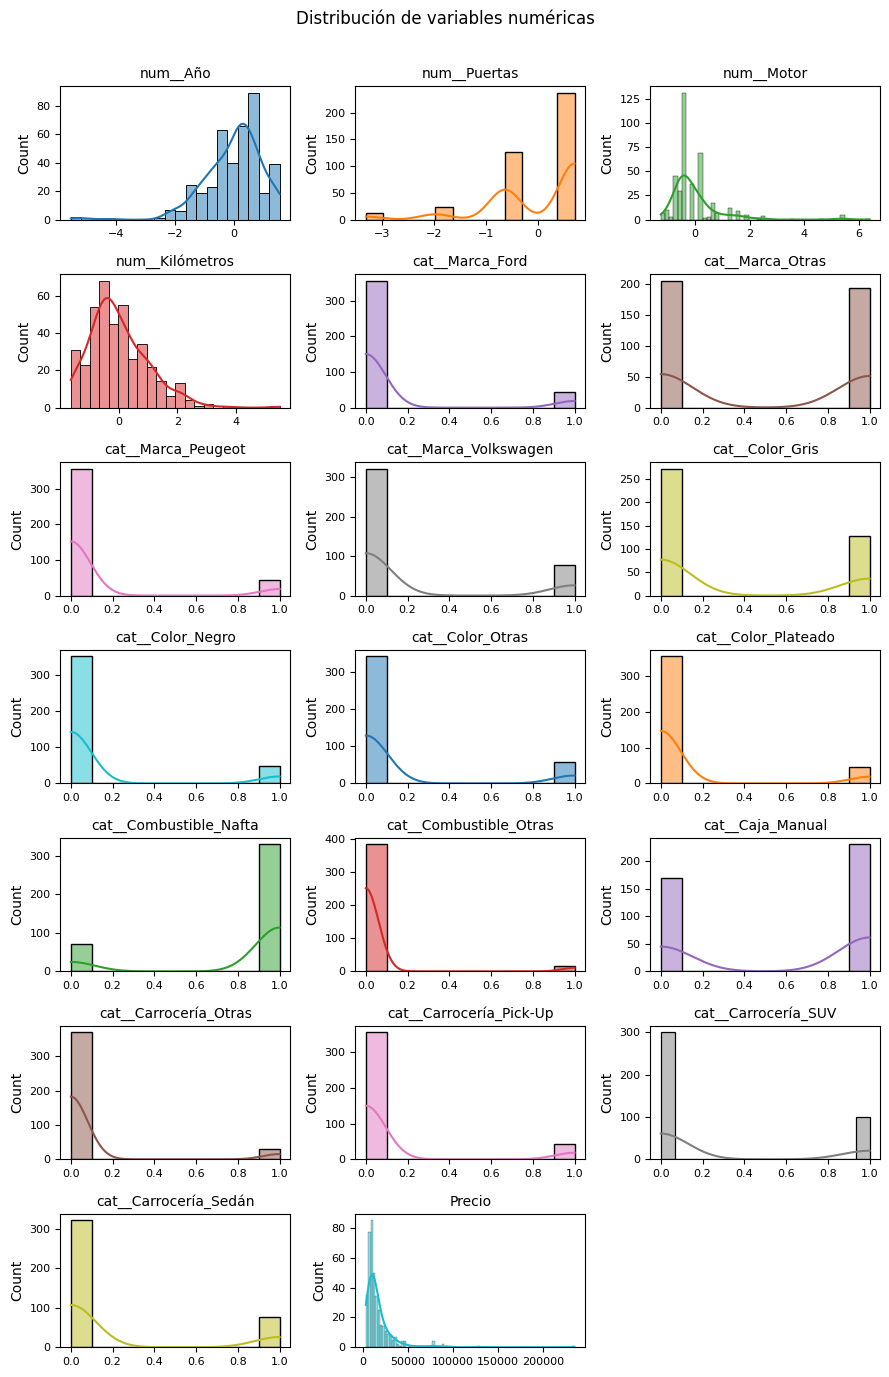

In [ ]:

# Cambia esta línea para seleccionar las columnas numéricas escaladas
columnas_numericas_escalado = X_train_escalado_data.select_dtypes(include=np.number).columns

# Ajustar número de subplots en función del número de columnas
n_cols = 3  # Número de columnas
n_rows = int(np.ceil(len(columnas_numericas_escalado) / n_cols))  # Número de filas

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9, 6*n_rows/3))  # Ajustar figsize
axes = axes.flat

# Obtener el ciclo de colores por defecto
default_colors = list(plt.rcParams['axes.prop_cycle'])

for i, colum in enumerate(columnas_numericas_escalado):
    # Usar el operador módulo para alternar entre los colores
    color = default_colors[i % len(default_colors)]["color"]

    sns.histplot(
        data=X_train_escalado_data,
        x=colum,
        stat="count",
        kde=True,
        color=color,  # Asignar el color
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Asegurarse de que hay un eje para cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes vacíos si hay menos columnas que subplots

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para dejar espacio para el título

# Reemplaza 'pad' con 'y' para controlar el espacio vertical
fig.suptitle('Distribución de variables numéricas', fontsize=12, y=0.98)  # Ajusta 'y' para el espacio deseado

# Mostrar el gráfico
plt.show()


<br>

## Ajuste del modelo

<br>

**Ajuste del modelo usando el enfoque de fórmula**

En este análisis, hemos ajustado un modelo de regresión lineal utilizando el enfoque de fórmula de la biblioteca statsmodels. Este enfoque permite especificar la relación entre la variable dependiente y las variables independientes de manera intuitiva, utilizando una notación similar a la de R. La variable dependiente en este caso es Precio, mientras que las variables independientes incluyen tanto numéricas (como Año, Puertas, Motor, Kilómetros) como categóricas (como Marca, Color, Combustible, Caja, y Carrocería).

In [ ]:

# Reemplazar caracteres especiales en los nombres de columnas (como guiones)
X_train_escalado_data.columns = X_train_escalado_data.columns.str.replace('-', '_')

# Asegúrate de que el índice de y_train sea consistente
y_train = y_train.reset_index(drop=True)

# Crear un DataFrame unificado
datos_train = X_train_escalado_data.copy()
datos_train['Precio'] = y_train.values  # Agregar la variable objetivo

# Definir la fórmula del modelo
formula = 'Precio ~ ' + ' + '.join(X_train_escalado_data.columns)

# Ajustar el modelo
modelo_f = smf.ols(formula=formula, data=datos_train)
modelo_res_f = modelo_f.fit()

# Mostrar el resumen del modelo
print(modelo_res_f.summary())



                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.206e+32
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:33:21   Log-Likelihood:                 9690.8
No. Observations:                 400   AIC:                        -1.934e+04
Df Residuals:                     379   BIC:                        -1.926e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

<br>

Los resultados del ajuste del modelo muestran un R-squared de 1.000, lo que indica que el modelo explica el 100% de la variabilidad en la variable dependiente Precio. Esto sugiere un ajuste perfecto a los datos; sin embargo, es importante tener en cuenta que un R-squared de 1.000 puede ser una señal de sobreajuste, especialmente si el modelo incluye un número elevado de variables en comparación con el tamaño de la muestra.

La F-statistic es extremadamente alta (1.206e+32) con un p-value asociado de 0.00, lo que indica que al menos una de las variables independientes tiene una relación significativa con la variable dependiente. Esto refuerza la validez del modelo en general.

**Coeficientes y significancia**

Los coeficientes estimados para cada variable proporcionan información sobre la dirección y magnitud de sus efectos en Precio:

- Intercept: El intercepto es aproximadamente -5.457e-12, lo que implica que cuando todas las variables independientes son cero, el precio estimado sería extremadamente bajo. Esto no tiene sentido práctico y subraya la importancia de interpretar el modelo dentro de un rango razonable de las variables independientes.

- num__Año: Tiene un coeficiente de -5.002e-12, lo que indica que a medida que el año aumenta, el precio tiende a disminuir, lo que puede ser contrario a las expectativas y sugiere que se debe examinar esta relación más a fondo.

- num__Puertas: Presenta un coeficiente de 2.274e-13, no significativo con un p-valor de 0.647, lo que sugiere que el número de puertas no tiene un impacto significativo en el precio.

- num__Motor: Un coeficiente de 1.364e-12 (p-valor de 0.018) indica que un aumento en el tamaño del motor está asociado con un incremento significativo en el precio.

- num__Kilómetros: Presenta un coeficiente negativo de -4.377e-12 (p-valor de 0.000), sugiriendo que a mayor cantidad de kilómetros recorridos, el precio tiende a disminuir, lo que es coherente con las expectativas del mercado.

**Variables Categóricas**

- cat__Marca_Ford: Un coeficiente de -5.912e-12 con un p-valor de 0.000 indica que, en comparación con la categoría de referencia, los vehículos de la marca Ford tienen un precio significativamente menor.

- cat__Color_Plateado: Muestra un efecto positivo (coeficiente de 4.547e-12, p-valor de 0.001), lo que sugiere que los vehículos de este color tienden a ser más caros.

- cat__Caja_Manual: Tiene un coeficiente alto de 7.503e-12 (p-valor de 0.000), indicando que los vehículos con caja manual son significativamente más caros en comparación con los de referencia.

- cat__Carrocería_SUV: Presenta un coeficiente de 3.638e-12 (p-valor de 0.001), lo que sugiere que los SUV tienen un precio más alto.

<br>

**Ajuste del modelo usando el enfoque de matrices**

En este análisis, se ha ajustado un modelo de regresión lineal utilizando el enfoque de matrices de la biblioteca statsmodels. Este método se basa en la creación de variables dummy para las variables categóricas, lo que permite incorporar todas las variables independientes de forma simultánea. La variable dependiente es el Precio, mientras que las variables independientes incluyen tanto variables numéricas (Año, Puertas, Motor, Kilómetros) como categóricas (Marca, Color, Combustible, Caja, y Carrocería).

In [45]:
# Crear variables dummy y evitar el primer nivel para evitar la multicolinealidad
X_train_dummies = pd.get_dummies(X_train_escalado_data, drop_first=True)

# Añadir una constante para el intercepto
X_train_dummies = sm.add_constant(X_train_dummies)

# Asegúrate de que el índice de y_train sea consistente
y_train = y_train.reset_index(drop=True)

# Ajustar el modelo
modelo_m = sm.OLS(endog=y_train, exog=X_train_dummies)
modelo_res_m = modelo_m.fit()

# Mostrar el resumen del modelo
print(modelo_res_m.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.105e+32
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:51:34   Log-Likelihood:                 9673.4
No. Observations:                 400   AIC:                        -1.930e+04
Df Residuals:                     379   BIC:                        -1.922e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -5

<br>

## Selección de los mejores predictores

In [ ]:
# Función de selección forward (hacia adelante)
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


# Función de selección backward (hacia atrás)
def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


In [ ]:
# Función de selección forward (hacia adelante)
predictores_forward = forward_selection(
    X=X_train,     # Matriz de predictores
    y=y_train,     # Variable dependiente
    criterio='aic',  # Puedes usar 'aic', 'bic' o 'rsquared_adj' como criterio
    add_constant=True,  # Añadir constante (intercepto)
    verbose=True   # Mostrar resultados iterativos
)

# Mostrar las variables seleccionadas en forward
print("Mejores predictores (Forward Selection):", predictores_forward)


ValueError: The indices for endog and exog are not aligned

<br>

In [ ]:
# Función de selección backward (hacia atrás)
predictores_backward = backward_selection(
    X=X_train,     # Matriz de predictores
    y=y_train,     # Variable dependiente
    criterio='aic',  # Puedes usar 'aic', 'bic' o 'rsquared_adj' como criterio
    add_constant=True,  # Añadir constante (intercepto)
    verbose=True   # Mostrar resultados iterativos
)

# Mostrar las variables seleccionadas en backward
print("Mejores predictores (Backward Selection):", predictores_backward)


<br>

In [ ]:
# Entrenar el modelo final con las variables seleccionadas
modelo_final = sm.OLS(endog=y_train, exog=X_train[predictores_forward])
modelo_final_res = modelo_final.fit()

# Mostrar el resumen del modelo final
print(modelo_final_res.summary())


<br>



In [ ]:
# Entrenar el modelo final con las variables seleccionadas
modelo_final = sm.OLS(endog=y_train, exog=X_train[predictores_backward])
modelo_final_res = modelo_final.fit()

# Mostrar el resumen del modelo final
print(modelo_final_res.summary())


In [ ]:
# Selección de predictores con sklearn SequentialFeatureSelector
# ==============================================================================
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
sfs = SequentialFeatureSelector(
    modelo,
    n_features_to_select = 'auto',
    direction            = 'forward',
    scoring              = 'r2',
    cv                   = 5
)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out().tolist()

## Diagnóstico de los resíduos

## Predicciones

<br>
<br>

# Conclusiones
